<a href="https://colab.research.google.com/github/sakshi-1208/ML-Iris_predict/blob/main/Copy_of_ML_Iris_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans

# To ignore the warnings 
import warnings as wg
wg.filterwarnings("ignore")

#load the data
from google.colab import files
uploaded = files.upload()

Saving iris_csv.csv to iris_csv (1).csv


In [ ]:
# Reading data iris dataset 
df = pd.read_csv('iris_csv.csv')

In [ ]:
df.head()

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.tail()

,sepallength,sepalwidth,petallength,petalwidth,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
df.shape

(150, 5)

In [ ]:
df.columns

Index(['sepallength', 'sepalwidth', 'petallength', 'petalwidth', 'class'], dtype='object')

In [ ]:
df['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepallength  150 non-null    float64
 1   sepalwidth   150 non-null    float64
 2   petallength  150 non-null    float64
 3   petalwidth   150 non-null    float64
 4   class        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.describe()

,sepallength,sepalwidth,petallength,petalwidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
# dropping the label column because it is an unsupervised learning problem 
iris = pd.DataFrame(df)
iris_df = iris.drop(columns= ['class'] )
iris_df.head()

,sepallength,sepalwidth,petallength,petalwidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
# Calculating the within-cluster sum of square

within_cluster_sum_of_square = []

clusters_range = range(1,15)
for k in clusters_range:
    km = KMeans(n_clusters=k)
    km = km.fit(iris_df)
    within_cluster_sum_of_square.append(km.inertia_)

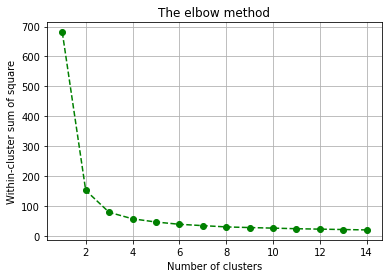

In [ ]:
# Plotting the "within-cluster sum of square" against clusters range

plt.plot(clusters_range, within_cluster_sum_of_square, 'go--', color='green')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster sum of square')
plt.grid()
plt.show()

In [ ]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
predictions = model.fit_predict(iris_df)

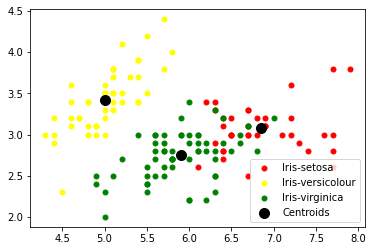

In [ ]:
x = iris_df.iloc[:, [0, 1, 2, 3]].values
plt.scatter(x[predictions == 0, 0], x[predictions == 0, 1], s = 25, c = 'red', label = 'Iris-setosa')
plt.scatter(x[predictions == 1, 0], x[predictions == 1, 1], s = 25, c = 'yellow', label = 'Iris-versicolour')
plt.scatter(x[predictions == 2, 0], x[predictions == 2, 1], s = 25, c = 'green', label = 'Iris-virginica')

# Plotting the cluster centers
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:,1], s = 100, c = 'black', label = 'Centroids')
plt.legend()
plt.show()